# **Feature Importance in Machine learning**

## **Introduction**
Understanding which features have the most impact on your model's predictions is crucial for improving performance, interpretability, and overall efficiency. Several techniques are available to assess feature importance, each with its strengths and use cases. In this article, we'll explore four popular methods: Model-Based Feature Importance, Permutation Importance, SHAP Values, and LIME. We'll implement each technique using the Titanic dataset.

### What is Feature Importance?

Feature importance refers to techniques that calculate a score for all the input features for a given model. The scores represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

Understanding which features have the most impact on your model's predictions is crucial for improving performance, interpretability, and overall efficiency. Several techniques are available to assess feature importance, each with its strengths and use cases. In this article, we'll explore four popular methods: **`Model-Based Feature Importance, Permutation Importance, SHAP Values, and LIME.`** We'll implement each technique using the Titanic dataset.

## **1. Model-Based Feature Importance**

Model-based feature importance methods are based on the internal mechanics of models like Decision Trees, Random Forests, and Gradient Boosting. These models can inherently provide insights into which features contribute the most to their decisions.

In [2]:
# let's go a head 

# first we need to import the required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the data
df = pd.read_csv('..\Data\Titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# great now we have the data, let's do some data preprocessing

df = df.drop(columns=['PassengerId', 'Name','Cabin','Ticket'])
col_with_missing_values = ['Age', 'Fare']
for col in col_with_missing_values:
    df[col] = df[col].fillna(df[col].mean())

cal_cols = ['Sex','Embarked']
df = pd.get_dummies(df, columns=cal_cols, drop_first=True)

X = df.drop(columns=['Survived'])
y = df['Survived']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")


Accuracy : 1.0


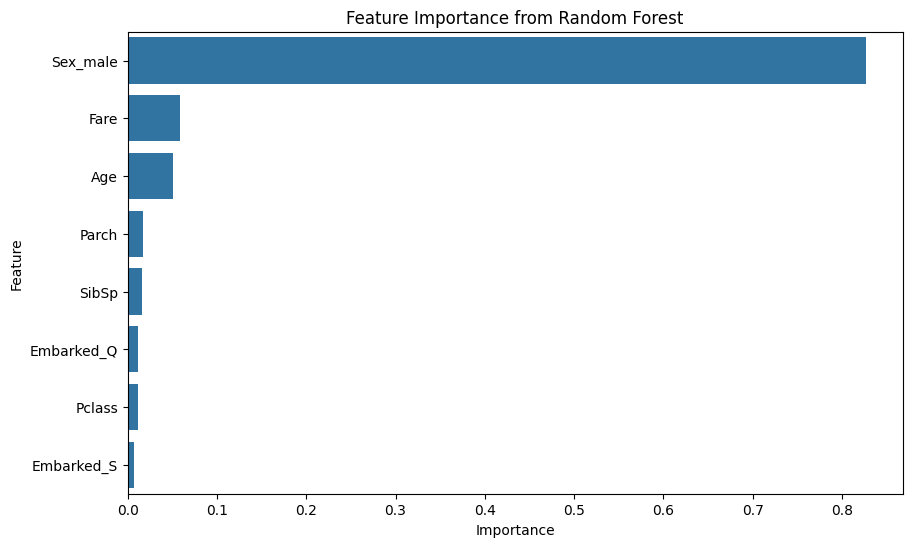

In [5]:
# Feature importance
importances = model.feature_importances_

features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

## **2. Permutation Importance**

Permutation importance measures the change in model performance when a feature's values are shuffled. This method helps determine how important a feature is by evaluating the drop in model accuracy after shuffling it.

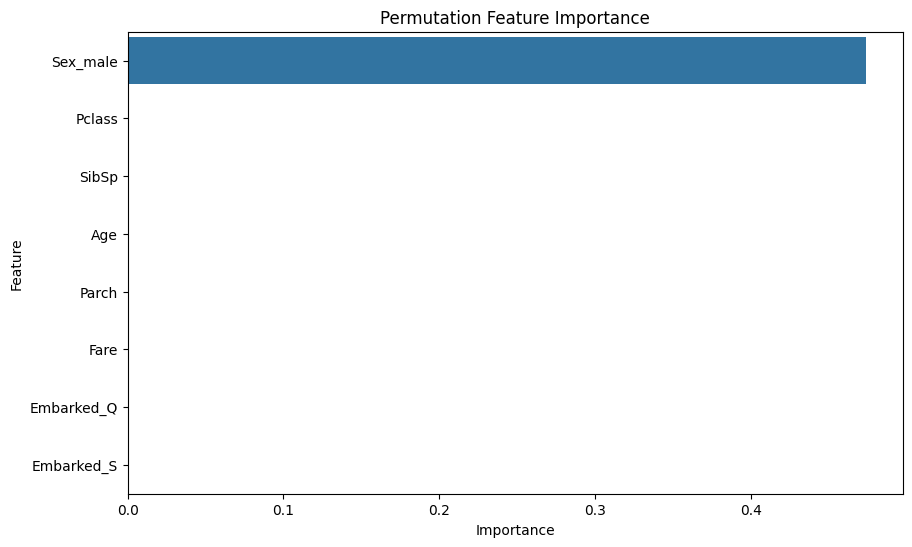

In [6]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame to display the results
perm_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Feature Importance')
plt.show()


## **3. SHAP Values**

SHAP (SHapley Additive exPlanations) values provide a detailed understanding of each feature's contribution to the model's predictions. SHAP values are based on cooperative game theory and offer global and local interpretability.



In [7]:
from sklearn.datasets import fetch_california_housing
# first we need to install shap library
# !pip install shap

# California Housing Prices
dataset = fetch_california_housing(as_frame = True)
X = dataset['data']
y = dataset['target']


model = RandomForestRegressor()
# Fits the model on the data
model.fit(X_train, y_train)


NameError: name 'RandomForestRegressor' is not defined

In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

# this will tack a lot of time to run about 20 minutes


ExactExplainer explainer: 4129it [30:07,  2.28it/s]                          


AssertionError: Summary plots need a matrix of shap_values, not a vector.

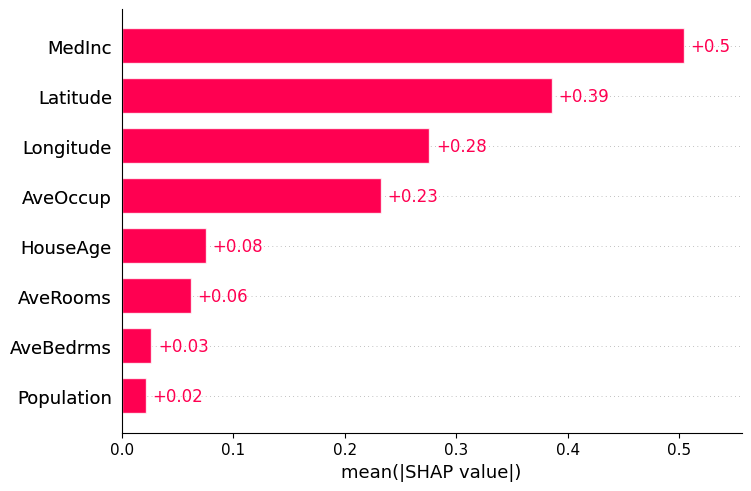

In [ ]:
shap.plots.bar(shap_values)

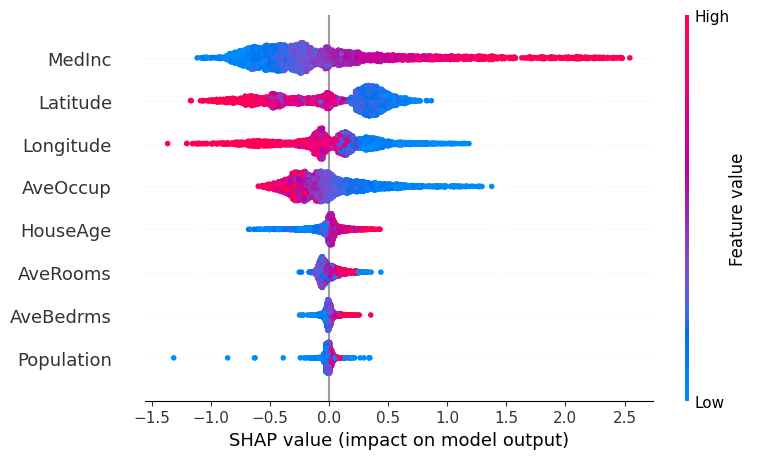

In [ ]:
shap.summary_plot(shap_values)

## **4. LIME (Local Interpretable Model-agnostic Explanations)**

LIME is a technique that provides local explanations for individual predictions. It approximates the model's behavior around a specific instance by fitting a simple, interpretable model.

In [ ]:
import lime
import lime.lime_tabular

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, 
                                                   feature_names=X.columns, 
                                                   class_names=['Not Survived', 'Survived'], 
                                                   discretize_continuous=True)

# Explain a single prediction
i = 25  # Choose an instance
exp = explainer.explain_instance(X_test.values[i], model.predict_proba, num_features=5)

# Display the explanation
exp.show_in_notebook(show_table=True)


d:\08.project\13.full data science roadmap\Data-Scienc-Roadmap-from-zero-to-hero\.venvRoadmap\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Comparing Feature Importance Techniques

| Technique                      | Advantages                                                                 | Disadvantages                                                              | Best For                                       |
|--------------------------------|-----------------------------------------------------------------------------|----------------------------------------------------------------------------|------------------------------------------------|
| **Model-Based Feature Importance** | - Easy to understand<br>- Works well with tree-based models                 | - May favor features with more categories (in trees)<br>- Depends on the model | Tree-based models like Random Forests          |
| **Permutation Importance**     | - Works with any model<br>- Shows true feature importance by checking model performance | - Takes a lot of time to compute<br>- Can be unreliable if features are related | Any model, especially when you need clear understanding |
| **SHAP Values**                | - Gives both overall and detailed insights<br>- Handles interactions between features well | - Takes a lot of computing power<br>- Can be hard to understand                | Complex models where full understanding is important  |
| **LIME**                       | - Focuses on explaining individual predictions<br>- Works with any model    | - Quality of explanation depends on the situation<br>- Can vary between predictions | Explaining specific predictions from complex models |


## Conclusion

For general-purpose use, especially in scenarios where interpretability is crucial, SHAP Values is the best choice. However, if computational resources are a concern, or if you are working with simpler models, techniques like Model-Based Feature Importance or Permutation Importance may be more suitable. For understanding specific predictions, LIME is a valuable tool.